In [219]:
import random
import cv2
import albumentations as A
import os
from os import walk, getcwd
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [220]:
classes_txt = open("C:/Users/bench/PycharmProjects/AISS_CV/classes.txt", "r")
lines = classes_txt.read().splitlines()
labels_dict = {}


i = 0
for label in lines : 
    labels_dict[str(i)] = label
    i += 1
    
print(labels_dict)    



{'0': 'Mensa', '1': 'AKK', '2': 'Audimax', '3': 'Neue Bib', '4': 'Alte Bib', '5': 'Studierendenwerk', '6': 'Lernzentrum', '7': 'Mathebau', '8': 'Harber-Bosch-Reaktor', '9': 'Statue am Ehrenhof', '10': 'Heinrich-Hertz-Denkmal', '11': 'Kolben', '12': 'Wärmeflasche', '13': 'Gründerschmiede'}


## Save all BBs and Labels from txt in mydict , key is the image name 

In [222]:
mypath = "C:/Users/bench/PycharmProjects/AISS_CV/Training Dataset/"
mydict = {}
def read_txt_yolo():
    txt_list = []
    for file in os.listdir(mypath):
        if file.endswith(".txt"):
            txt_list.append(file)

    for txt_name in txt_list:
        txt_path = mypath + txt_name
#       print("Input:" + txt_path)
        txt_file = open(txt_path, "r")
        lines = txt_file.read().splitlines()
#       print(lines)
        key = txt_name[:-4]
        mydict[key] = []
        for idx, line in enumerate(lines):
            value = line.split()
            x = y = w = h = cls = None
            cls = value[0]
            cls = labels_dict.get(cls)
            x = float(value[1])
            y = float(value[2])
            w = float(value[3])
            h = float(value[4])
#           print("CLASS = " + str(cls)  + "|####### X = " + str(x) + " |### Y ##### = " + str(y) + " |#### W #####| " + str(w) + " |####### H ########" + str(h) )
            mydict[key].append([x,y,w,h,cls])

    
read_txt_yolo()
print(mydict)
print(mydict.get("AKK_ASTA_11"))

{'AKK_ASTA_1': [[0.744141, 0.429591, 0.511719, 0.774306, 'AKK']], 'AKK_ASTA_10': [[0.489831, 0.49504, 0.979167, 0.989418, 'AKK']], 'AKK_ASTA_11': [[0.482143, 0.323909, 0.247024, 0.202712, 'Alte Bib'], [0.187004, 0.513558, 0.373016, 0.740741, 'AKK']], 'AKK_ASTA_12': [[0.557788, 0.469577, 0.853175, 0.740741, 'AKK']], 'AKK_ASTA_13': [[0.544519, 0.537202, 0.910962, 0.49504, 'AKK']], 'AKK_ASTA_14': [[0.585069, 0.423115, 0.829861, 0.842262, 'AKK']], 'AKK_ASTA_15': [[0.616815, 0.585152, 0.766369, 0.606151, 'AKK']], 'AKK_ASTA_16': [[0.56932, 0.568122, 0.861359, 0.662698, 'AKK']], 'AKK_ASTA_17': [[0.542039, 0.456184, 0.915923, 0.883929, 'AKK']], 'AKK_ASTA_18': [[0.570933, 0.465608, 0.858135, 0.803571, 'AKK']], 'AKK_ASTA_19': [[0.500744, 0.494213, 0.998512, 0.977844, 'AKK']], 'AKK_ASTA_2': [[0.281141, 0.389082, 0.561849, 0.592978, 'AKK'], [0.672743, 0.369213, 0.15191, 0.167438, 'Alte Bib']], 'AKK_ASTA_20': [[0.417039, 0.481812, 0.833581, 0.962963, 'AKK'], [0.794643, 0.406746, 0.164683, 0.165344,

## Test Image and Box Transformation

In [151]:
import random

import cv2
from matplotlib import pyplot as plt

import albumentations as A

In [162]:
BOX_COLOR = (255, 0, 0) # Red
TEXT_COLOR = (255, 255, 255) # White


def visualize_bbox(img, bbox, class_name, color=BOX_COLOR, thickness=5):
    """Visualizes a single bounding box on the image"""
    x, y, w, h = bbox
    dh, dw, _ = img.shape
    l = int((x - w / 2) * dw)
    r = int((x + w / 2) * dw)
    t = int((y - h / 2) * dh)
    b = int((y + h / 2) * dh)
    
    if l < 0:
        l = 0
    if r > dw - 1:
        r = dw - 1
    if t < 0:
        t = 0
    if b > dh - 1:
        b = dh - 1

    cv2.rectangle(img, (l, t), (r, b), (0, 0, 255),  thickness = thickness
                 )

    fl = "AKK"
    
#     cv2.putText(
#         img,
#         text=fl,
#         org=(x, y - int(0.3 * 4)),
#         fontFace=cv2.FONT_HERSHEY_SIMPLEX,
#         fontScale=0.35, 
#         color=TEXT_COLOR, 
#         lineType=cv2.LINE_AA,
#     )
    print("XMIN Y MIN " ,  x,y)
    return img


def visualize(image, bboxes, category_ids, category_id_to_name):
    
    
    img = image.copy()
    for bbox, category_id in zip(bboxes, category_ids):
        class_name = category_id_to_name[category_id]
        img = visualize_bbox(img, bbox, class_name)
        
    plt.figure(figsize=(12, 12))
    plt.axis('off')
    plt.imshow(img)
#     cv2.imwrite(r"./result/AKKMODY.jpg",img)


In [163]:
image = cv2.imread('./AKK_ASTA_1.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


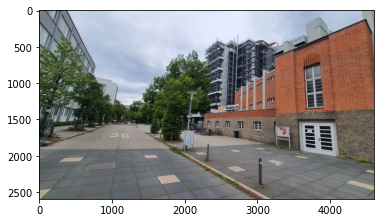

In [164]:
plt.imshow(image)

In [167]:
bboxes = [[0.744141, 0.429591, 0.511719, 0.774306]]
category_ids = [1]

# We will use the mapping from category_id to the class name
# to visualize the class label for the bounding box on the image
category_id_to_name = {1: 'AKK'}

[[0.744141, 0.429591, 0.511719, 0.774306]]
XMIN Y MIN  0.744141 0.429591


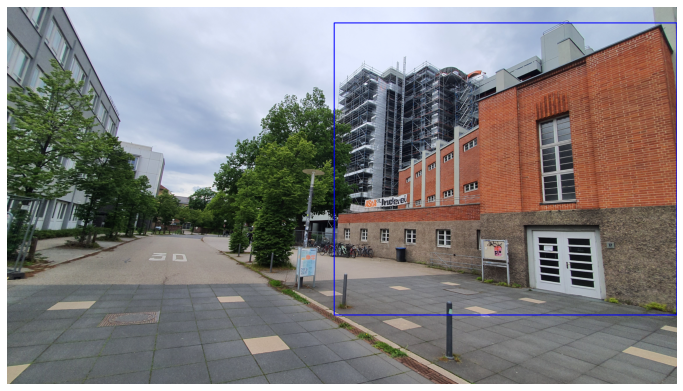

In [208]:
print(bboxes)
visualize(image, bboxes, category_ids, category_id_to_name)


## Augmentation Pipeline

In [213]:
import albumentations as A
import cv2

In [216]:


transform = A.Compose([
    
    A.HorizontalFlip(p=0.5),
    A.RandomBrightnessContrast(p=0.2),
], bbox_params=A.BboxParams(format='coco',label_fields=["category_ids"]))



XMIN Y MIN  4606.74414 0.429591
[(4606.74414, 0.429591, 0.5117190000000846, 0.7743059999999999)]


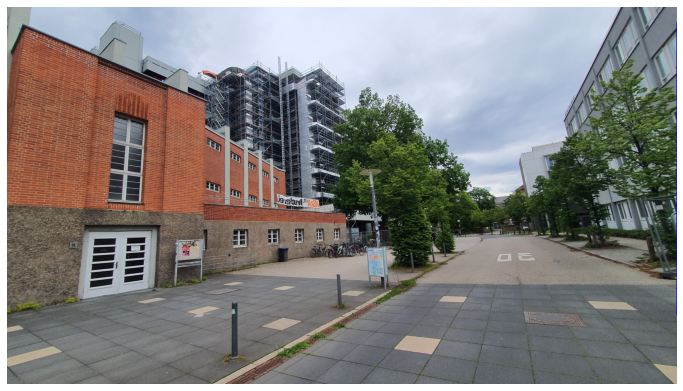

In [217]:
random.seed(7)
transformed = transform(image=image, bboxes=bboxes, category_ids=category_ids)
visualize(
    transformed['image'],
    transformed['bboxes'],
    transformed['category_ids'],
    category_id_to_name,
)
print(transformed["bboxes"])

In [210]:
transform = A.Compose(
    [A.ShiftScaleRotate(p=0.5)],
    bbox_params=A.BboxParams(format='coco', label_fields=['category_ids']),
)

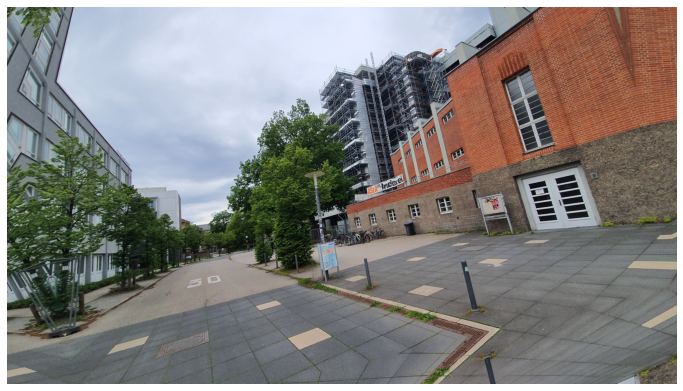

In [207]:
random.seed(7)
transformed = transform(image=image, bboxes=bboxes, category_ids=category_ids)
visualize(
    transformed['image'],
    transformed['bboxes'],
    transformed['category_ids'],
    category_id_to_name,
)